# Notebook imports

In [43]:
from sklearn.datasets import load_boston
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

# Gather Data

In [2]:
boston_dataset = load_boston()

c:\Users\scott\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [3]:
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features    

In [5]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# Actual prices in thousands
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with Pandas DataFrames

In [7]:
# Creates our pandas dataframe
data = DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names, )

# Add the target column to the dataframe
data['PRICE'] = boston_dataset.target

In [8]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

## Cleaning data - check for missing values

In [9]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualizing data - Histograms, distributions and bar charts

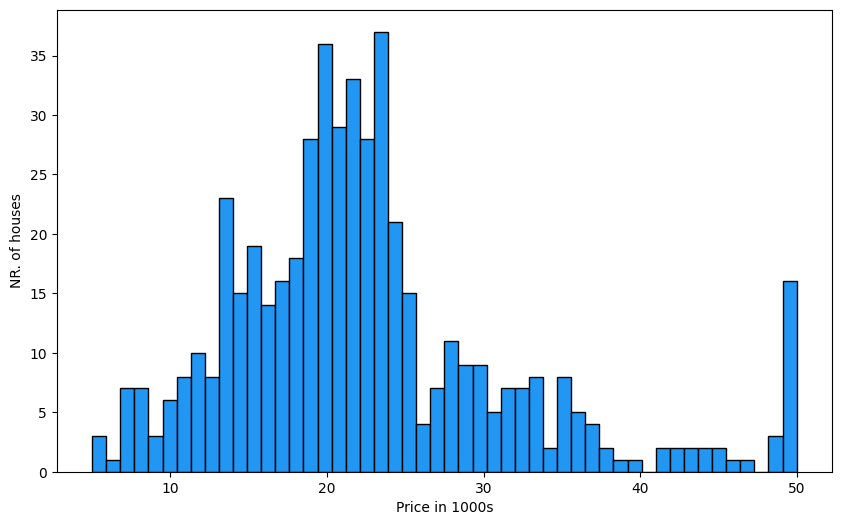

In [11]:
plt.figure(figsize=(10, 6))
plt.xlabel("Price in 1000s")
plt.ylabel("NR. of houses")
plt.hist(data["PRICE"], bins=50, ec='black', color='#2196F3')
plt.show()

<Figure size 1000x600 with 0 Axes>

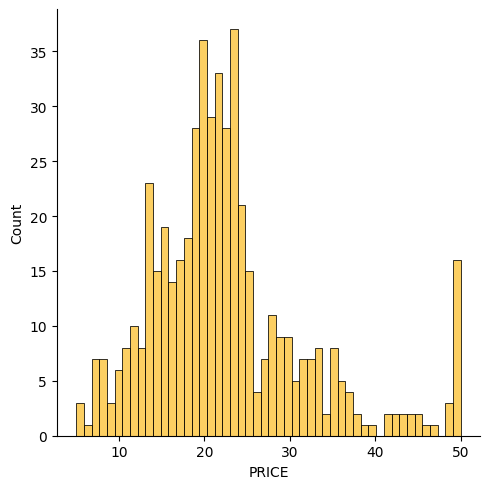

In [12]:
plt.figure(figsize=(10, 6))
sns.displot(data['PRICE'], bins=50, color="#fbc02d")
plt.show()

<Figure size 1000x600 with 0 Axes>

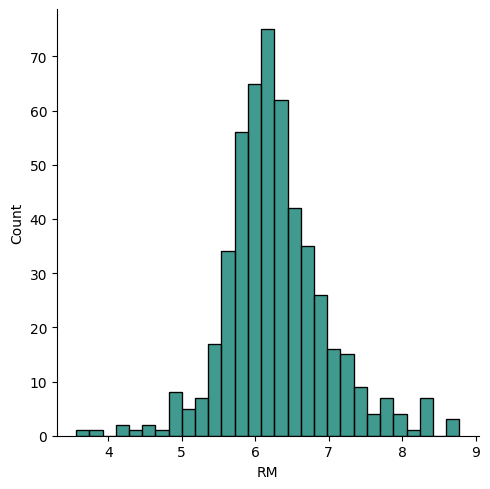

In [13]:
plt.figure(figsize=(10, 6))
sns.displot(data['RM'], color="#00796b")
plt.show()

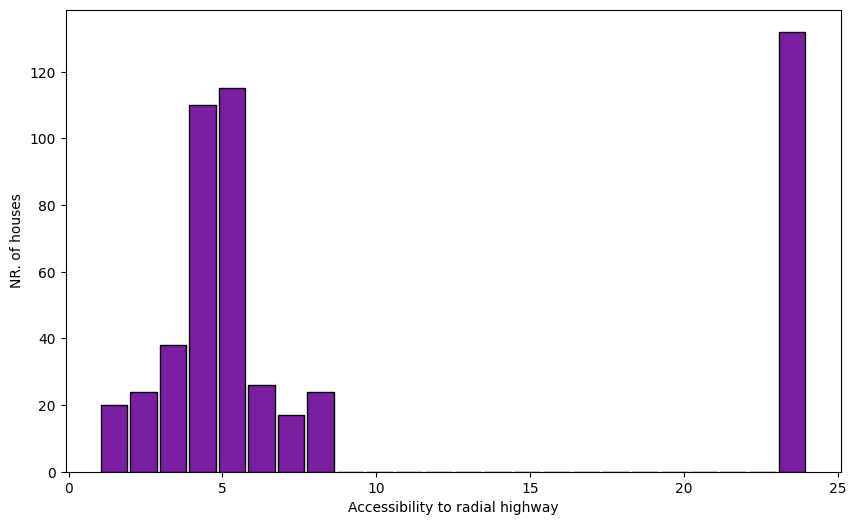

In [14]:
plt.figure(figsize=(10, 6))
plt.xlabel("Accessibility to radial highway")
plt.ylabel("NR. of houses")
plt.hist(data['RAD'], ec='black', color="#7B1Fa2", bins=24, rwidth=.9)
plt.show()

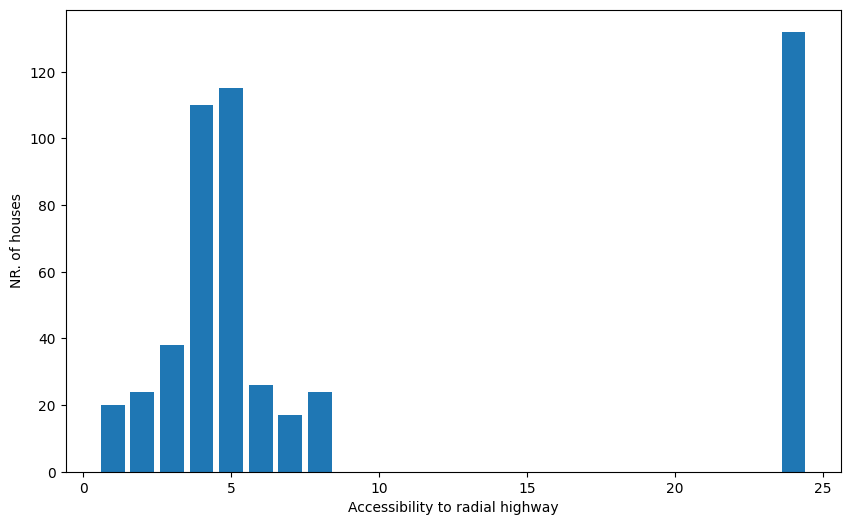

In [15]:
frequency = data['RAD'].value_counts()

plt.figure(figsize=(10, 6))
plt.xlabel("Accessibility to radial highway")
plt.ylabel("NR. of houses")
plt.bar(frequency.index, height=frequency.values)
plt.show()

In [16]:
data["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# Descriptive Statistics    

In [17]:
min_price = data.min()
max_price = data.max()
median_price = data.median()
mean_price = data.mean()

In [18]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation
## $$ \rho_{XY} = cor(X,Y)$$
## $$ -1.0 \leq \rho_{XY} \leq +1.0$$

In [19]:
data["PRICE"].corr(data["RM"])

0.6953599470715396

In [20]:
data["PRICE"].corr(data["PTRATIO"])

-0.5077866855375618

In [21]:
# Pearson Correlation Coefficients
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [22]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

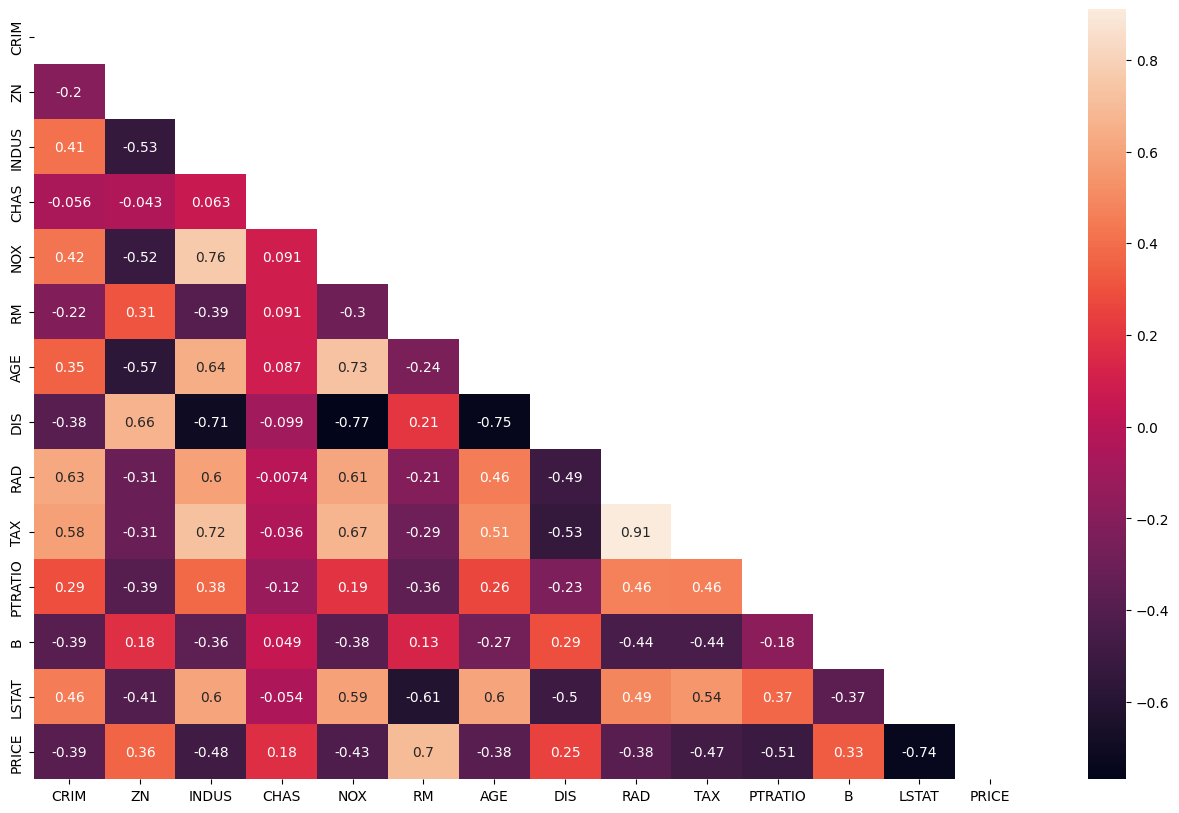

In [23]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

Text(0.5, 1.0, 'DIS vs NOX (Correlation -0.769)')

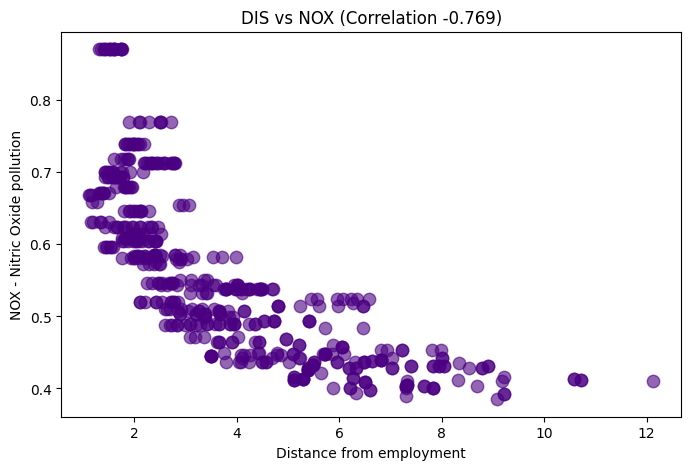

In [24]:
nox_dis_corr = round(data["NOX"].corr(data["DIS"]), 3)

plt.figure(figsize=(8,5))
plt.scatter(data["DIS"], data["NOX"], alpha=0.6, s=80, color='indigo')
plt.xlabel("Distance from employment")
plt.ylabel("NOX - Nitric Oxide pollution")
plt.title(f"DIS vs NOX (Correlation {nox_dis_corr})")

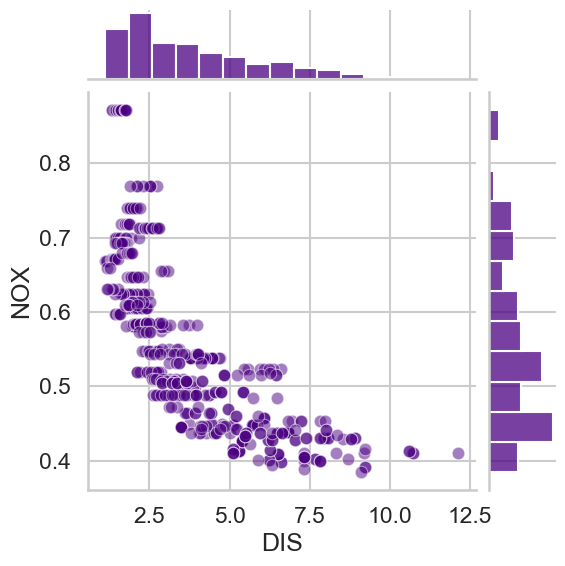

In [25]:
sns.set()
sns.set_context("talk")
sns.set_style("whitegrid")
sns.jointplot(x=data["DIS"], y=data["NOX"], color="indigo", joint_kws={"alpha": 0.5})
plt.show()

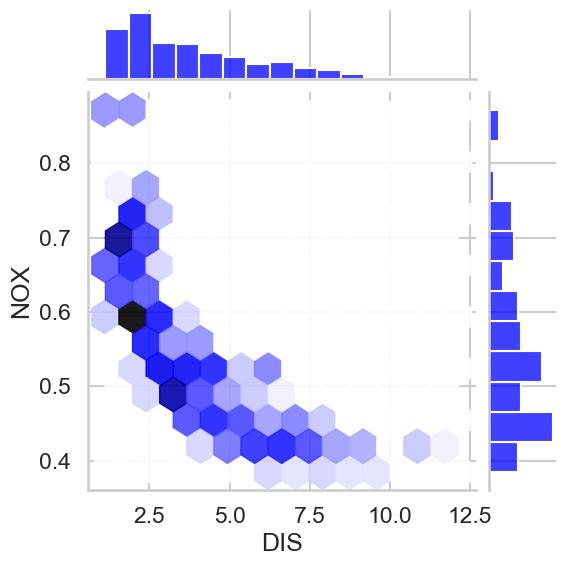

In [26]:
sns.set()
sns.set_context("talk")
sns.set_style("whitegrid")
sns.jointplot(x=data["DIS"], y=data["NOX"], color="blue", joint_kws={"alpha": 0.9}, kind="hex")

plt.show()

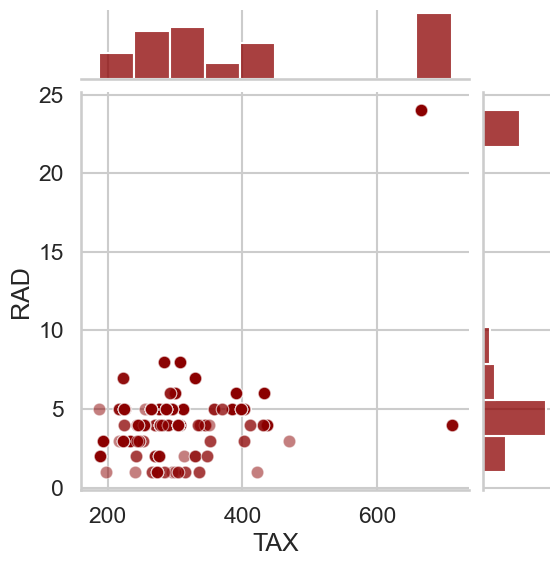

In [27]:
sns.set()
sns.set_context("talk")
sns.set_style("whitegrid")
sns.jointplot(x=data["TAX"], y=data["RAD"], color="darkred", joint_kws={"alpha": 0.5})
plt.show()

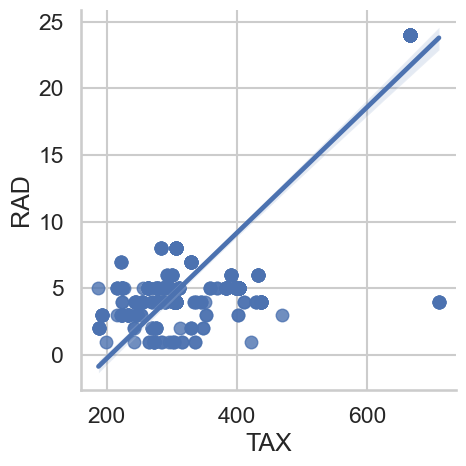

In [28]:
sns.lmplot(x='TAX', y='RAD', data=data)
plt.show()

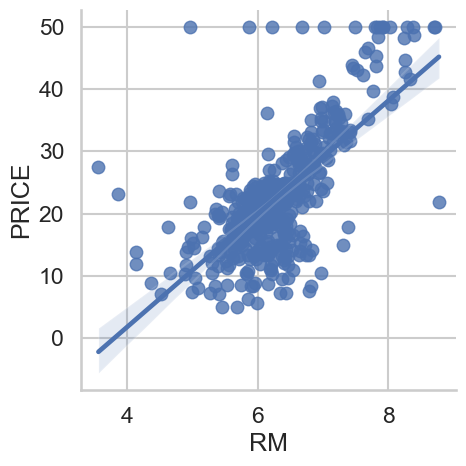

In [29]:
sns.set()
sns.set_context("talk")
sns.set_style("whitegrid")
sns.lmplot(x="RM", y="PRICE", data=data)
plt.show()

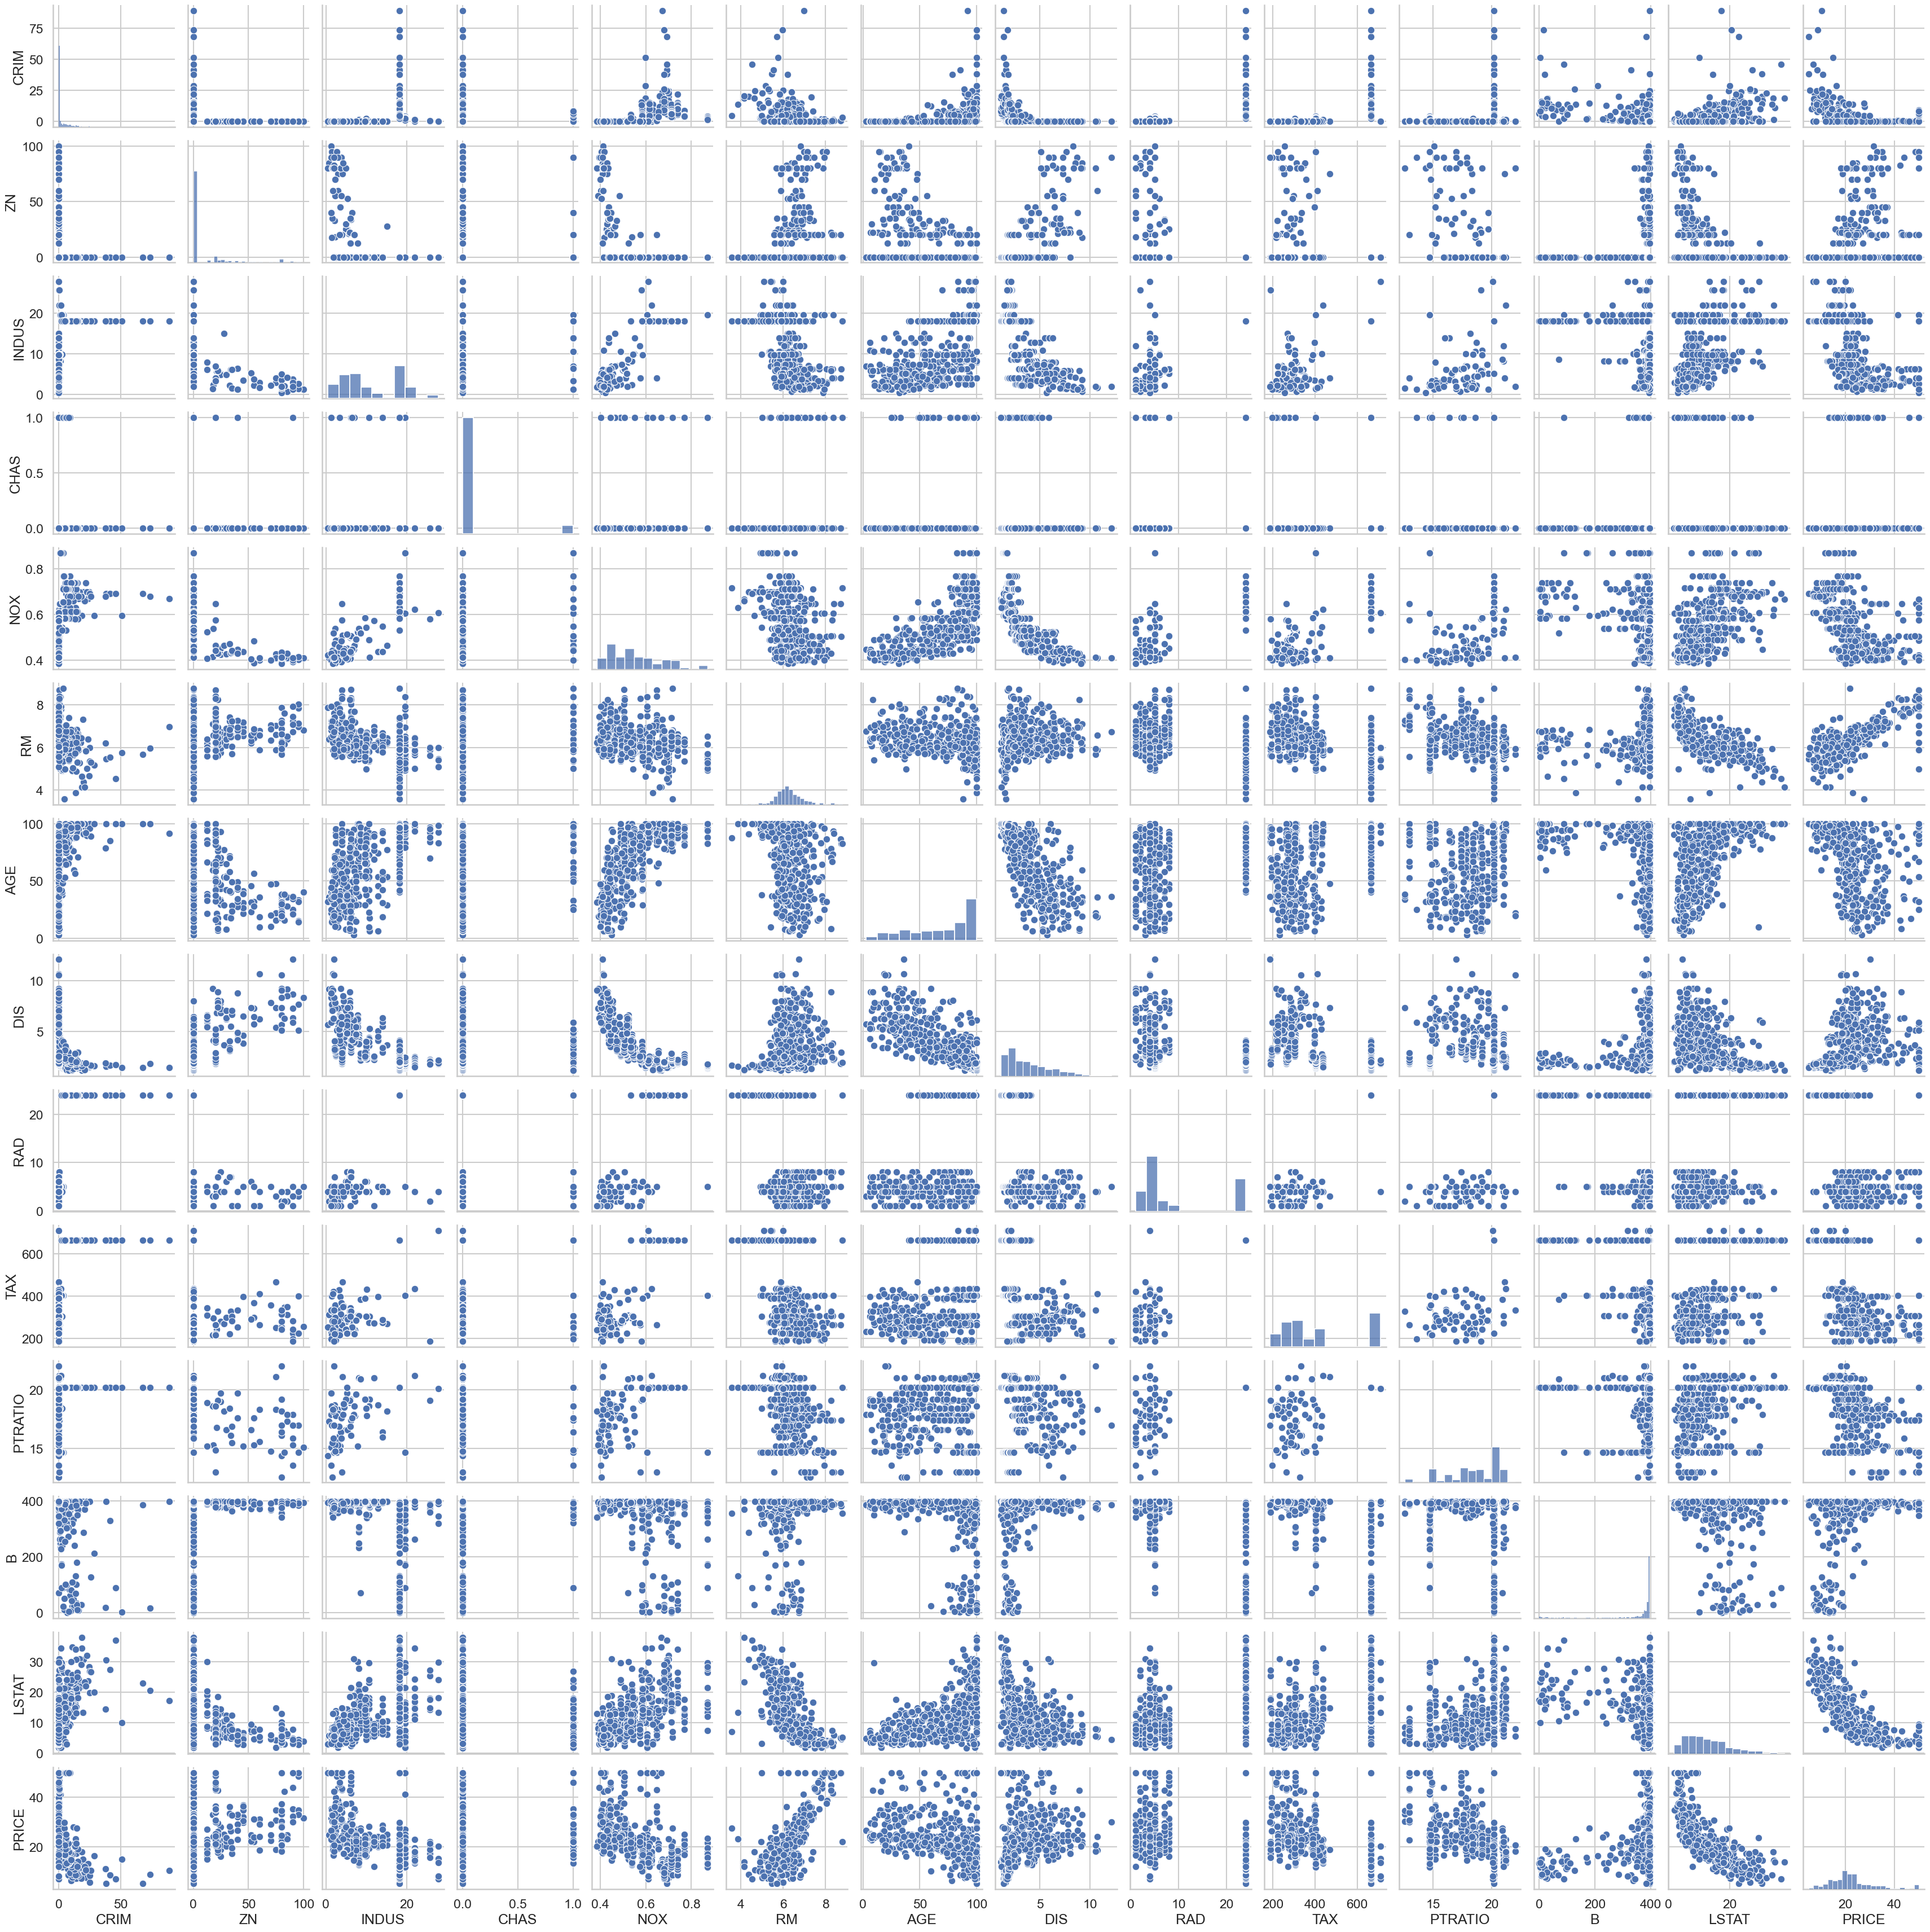

In [30]:
sns.pairplot(data)
plt.show()

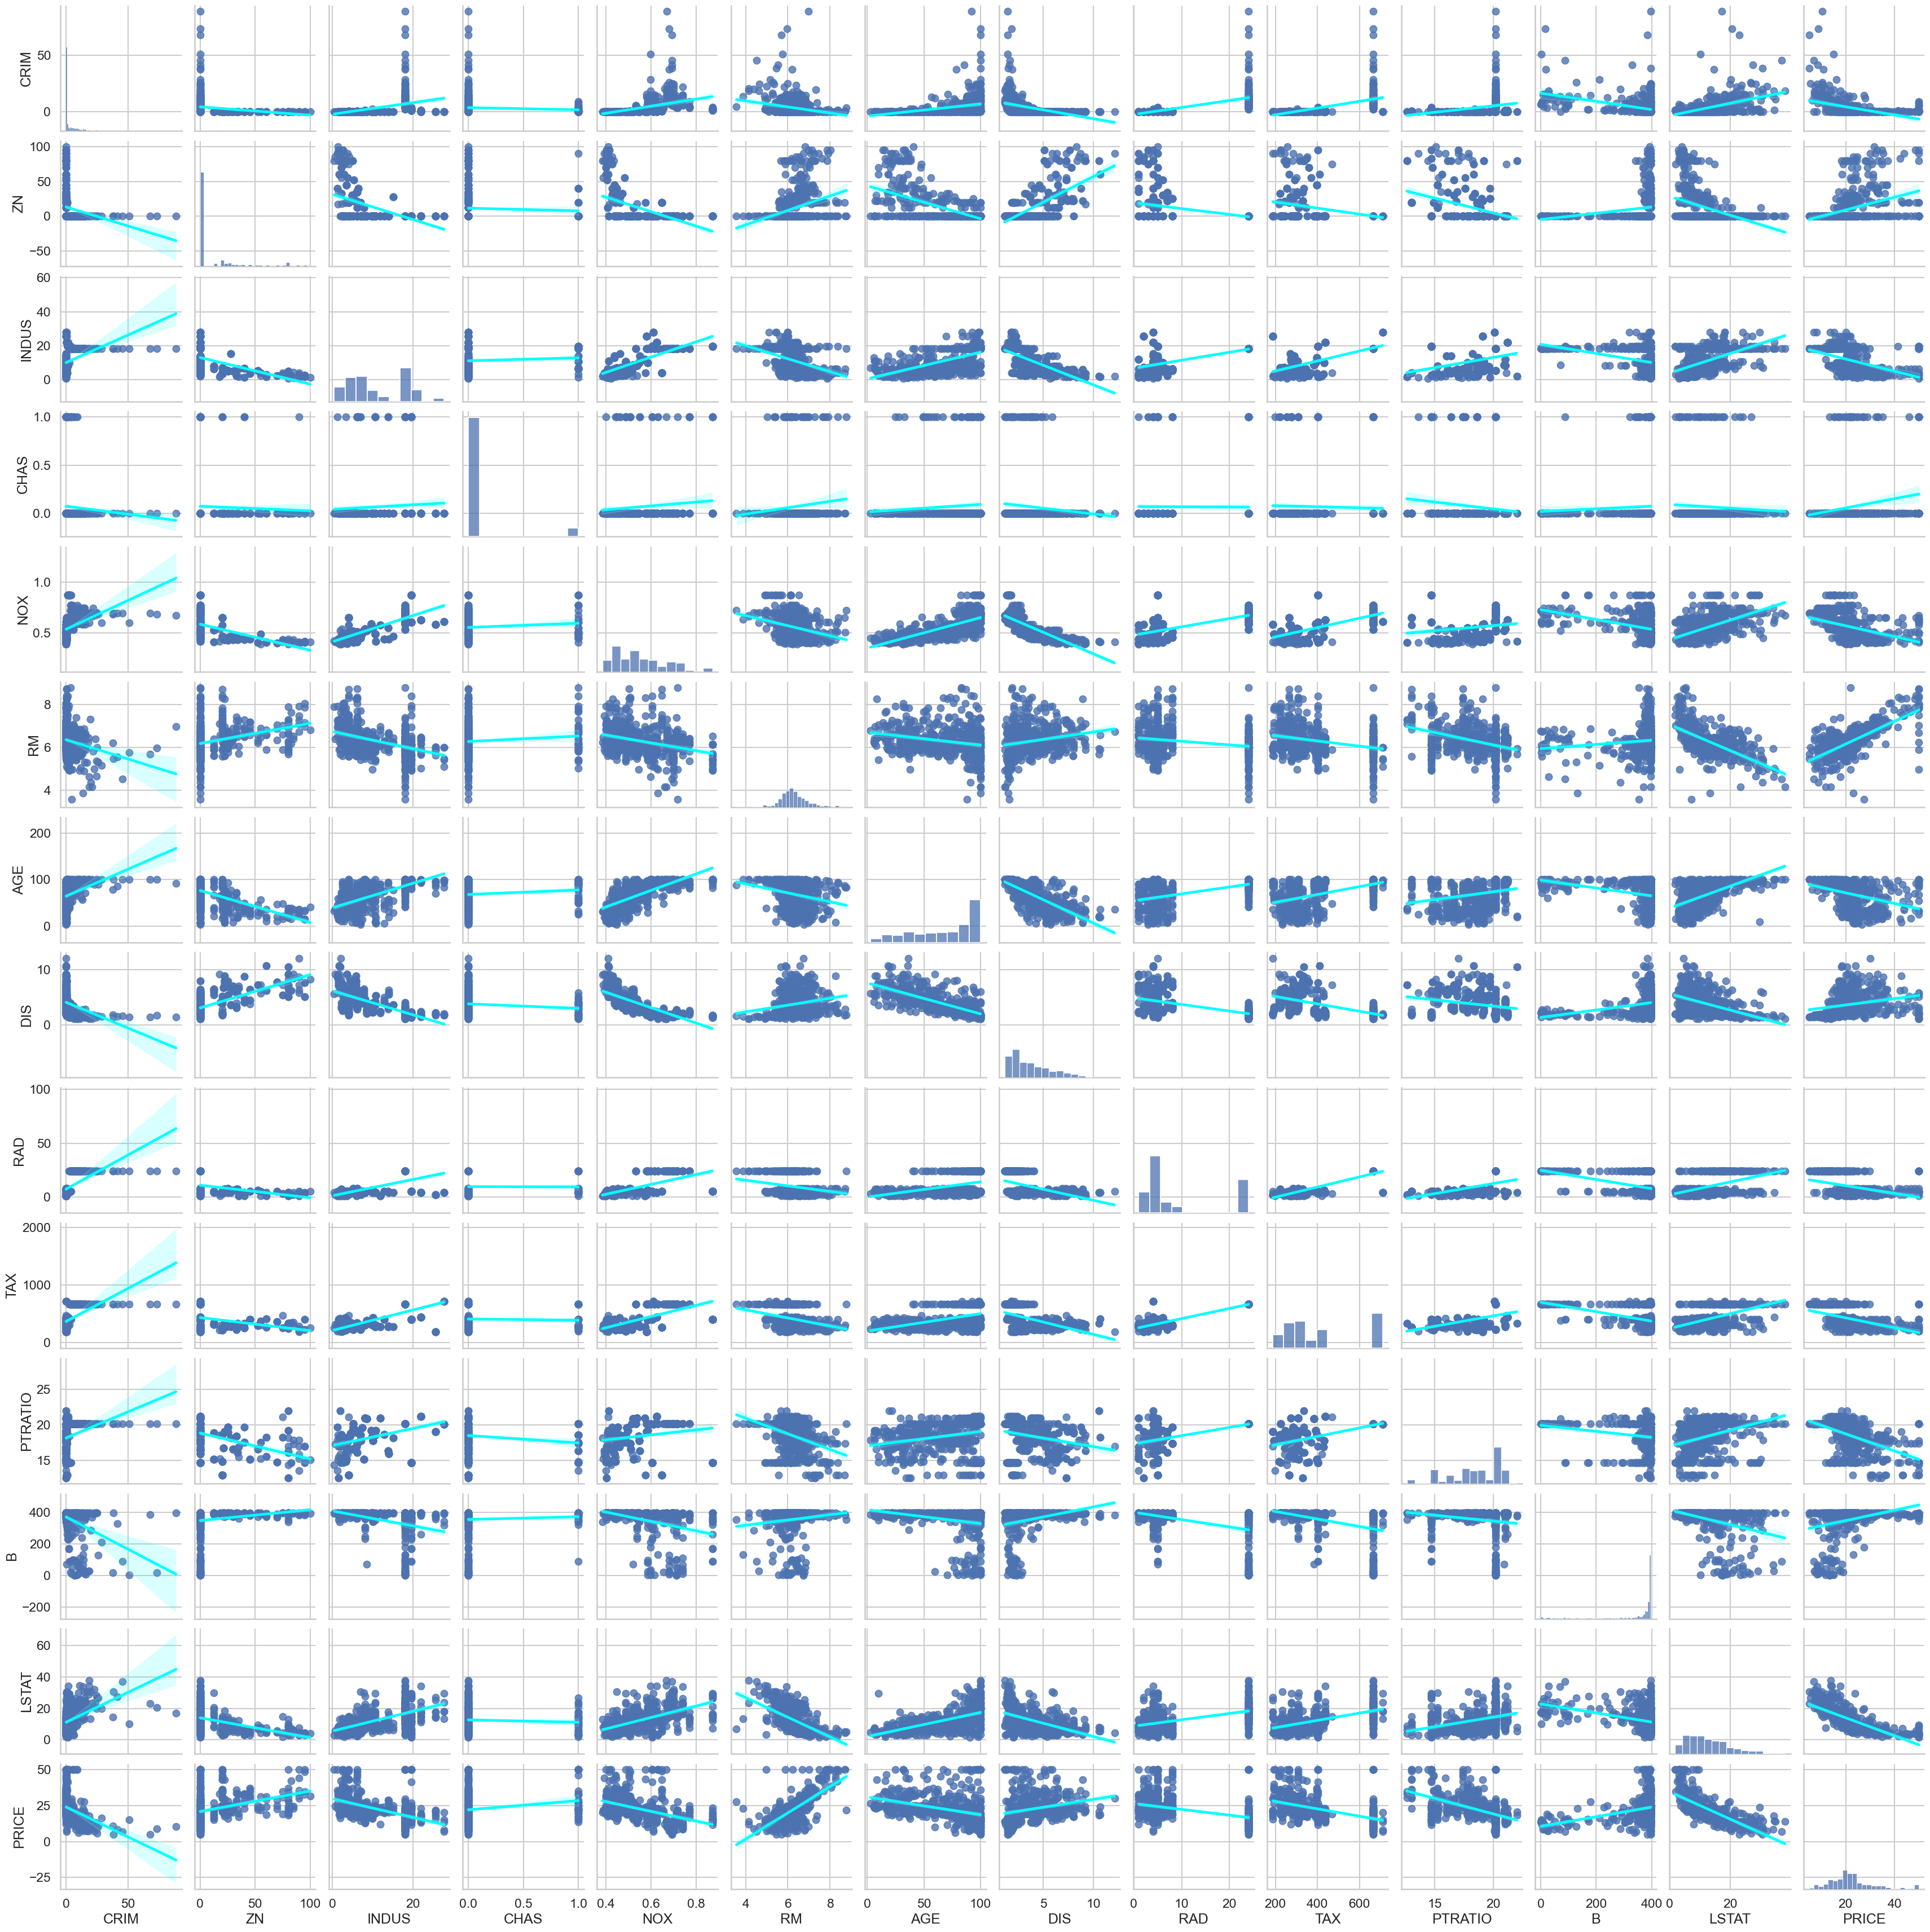

In [31]:
sns.pairplot(data, kind='reg', plot_kws={"line_kws": {"color": 'cyan'}})
plt.show()

## Training and Test dataset split

In [32]:
# Remove the target values
prices = data["PRICE"]
features = data.drop("PRICE", axis=1)

# Shuffle and split the data into training and testing data, 20% train 80% test
x_train, x_tests, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

x_tests.shape[0] / features.shape[0]

0.2015810276679842

## Multivariable Regression

In [33]:
regr = LinearRegression()
regr.fit(x_train, y_train)

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=["coef"])

Intercept 36.5330513828241


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [34]:
print(f"Training data r^2 {regr.score(x_train, y_train)}")
print(f"Test data r^2 {regr.score(x_tests, y_test)}")

Training data r^2 0.750121534530608
Test data r^2 0.6709339839115628


## Data Transformations

In [35]:
data["PRICE"].skew()

1.1080984082549072

In [36]:
y_log = np.log(data["PRICE"])
y_log.skew()

-0.33032129530987864

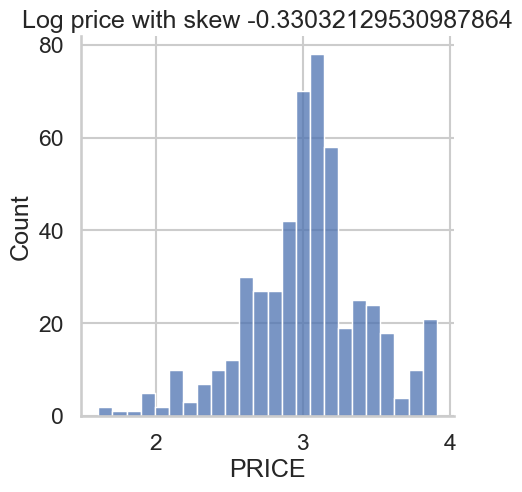

In [37]:
sns.displot(y_log)
plt.title(f"Log price with skew {y_log.skew()}")
plt.show()

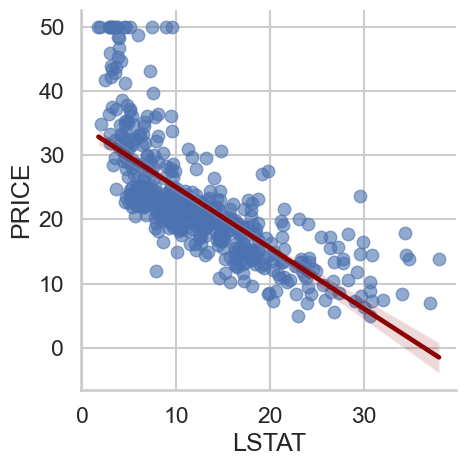

In [38]:
sns.lmplot(x="LSTAT", y="PRICE", data=data, scatter_kws={"alpha": 0.6}, line_kws={"color": 'darkred'})
plt.show()

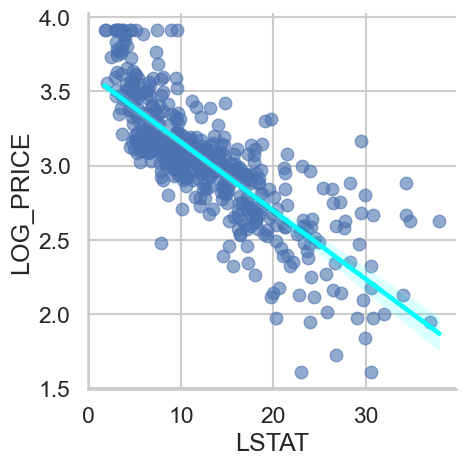

In [39]:
transformed_data = features
transformed_data["LOG_PRICE"] = y_log
sns.lmplot(x="LSTAT", y="LOG_PRICE", data=transformed_data, scatter_kws={"alpha": 0.6}, line_kws={"color": 'cyan'})
plt.show()

## Regression using log values

In [40]:
# Remove the target values
prices = np.log(data["PRICE"])
features = data.drop("PRICE", axis=1)

# Shuffle and split the data into training and testing data, 20% train 80% test
x_train, x_tests, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(x_train, y_train)

print(f"Training data r^2 {regr.score(x_train, y_train)}")
print(f"Test data r^2 {regr.score(x_tests, y_test)}")

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=["coef"])

Training data r^2 0.7930234826697584
Test data r^2 0.744692230626071
Intercept 4.059943871775174


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [41]:
# Reverse the log of the charles river price
np.e ** 0.080331

1.0836456950439142

## p values & evaluating coefficients

In [59]:
x_incl_const = sm.add_constant(x_train)

# Ordinary least squares
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

pd.DataFrame({'coef_name': results.params, 'p-value': round(results.pvalues, 3)})

coef_name  p-value
const     4.059944    0.000
CRIM     -0.010672    0.000
ZN        0.001579    0.009
INDUS     0.002030    0.445
CHAS      0.080331    0.038
NOX      -0.704068    0.000
RM        0.073404    0.000
AGE       0.000763    0.209
DIS      -0.047633    0.000
RAD       0.014565    0.000
TAX      -0.000645    0.000
PTRATIO  -0.034795    0.000
B         0.000516    0.000
LSTAT    -0.031390    0.000

## Testing for multicollinearity
$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX + ... + \alpha_12 LSTAT $$
$$ VIF_{TAX} = \frac{1}{(1 - R_{TAX}^2)} $$

In [46]:
variance_inflation_factor(exog=x_incl_const, exog_idx=1)

1.7145250443932485

In [55]:
for i in range(0, len(x_incl_const.columns)):
    print(variance_inflation_factor(exog=x_incl_const, exog_idx=i))

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674638
1.0788133385000576
4.410320817897635
1.8404053075678575
3.3267660823099408
4.222923410477865
7.314299817005065
8.508856493040817
1.8399116326514058
1.3386713255364715
2.812544292793036


In [60]:
vif = []
for i in range(0, len(x_incl_const.columns)):
    vif.append(variance_inflation_factor(exog=x_incl_const, exog_idx=i))
pd.DataFrame({'coef_name': x_incl_const.columns, 'vif': np.around(vif, 2)})

coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81